***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Fall 2023

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [2]:
### Load some packages

import networkx as nx # for handling graphs/networks
import numpy as np # for basic scientific computing
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# RW sampling

In [3]:
def RW(G, x0=None, steps=1, return_history=False):
    # simple symmetric random walk on graph G
    # initialization at x0
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0

    history = []
    for i in np.arange(steps):
        if len(list(G.neighbors(x))) == 0:
            print("RW is stuck at isolated node")
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        else:
            x = np.random.choice(list(G.neighbors(x)))

        if return_history:
            history.append(x)

    if not return_history:
        return x
    else:
        return history

In [4]:
def IID_sampling(G, steps=1):
    # sample uniformly random nodes independently 'steps' times
    history = []
    for i in np.arange(steps):
        x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        history.append(x)
    return history

In [5]:
# Initialize graph
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

Number of nodes: 769
Number of edges: 16656
edge density: 0.05640442132639792
Avg. clustering coefficient: 0.4091173048334611
Avg. shortest path length: 2.3378480449470755
Number of nodes: 94
Number of edges: 737


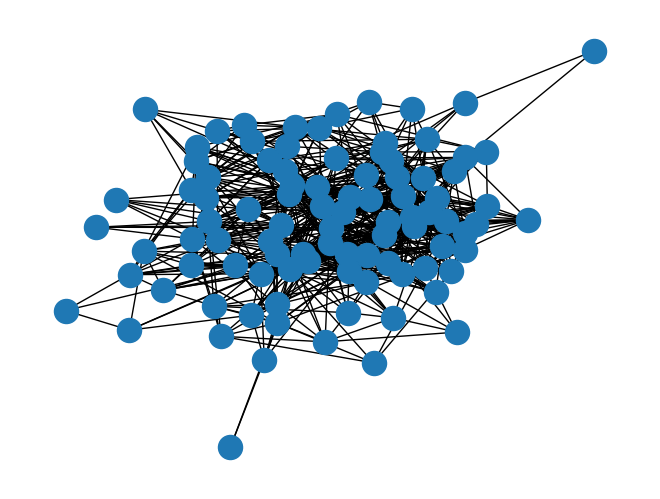

In [6]:
## Load Caltech Facebook graph

# Initialize graph
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
print("edge density:", nx.density(G))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print("Avg. clustering coefficient:", nx.average_clustering(G0))
print("Avg. shortest path length:", nx.average_shortest_path_length(G0))


# Perform a random walk and take an induced subgraph on a random walk trajectory
RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

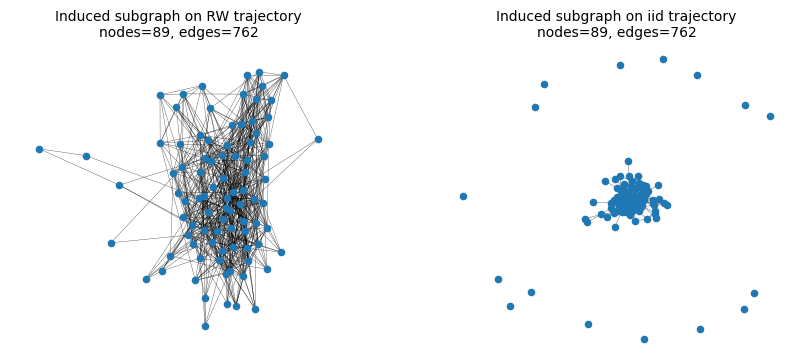

In [7]:
fig = plt.figure(figsize=[10,4], constrained_layout=False)
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.3, hspace=0.1)

####
inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
weights = [0.2 for u,v in H.edges]

nx.draw(H, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Induced subgraph on RW trajectory" + "\n" +   "nodes={}, edges={}".format(len(list(H.nodes())), len(list(H.edges()))) , fontsize=10)

####
inner_grid = outer_grid[0,1].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

IID_trajectory = IID_sampling(G0, steps=100)
H1 = G.subgraph(nodes=IID_trajectory)
weights = [0.2 for u,v in H1.edges]

nx.draw(H1, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Induced subgraph on iid trajectory" + "\n" + "nodes={}, edges={}".format(len(list(H.nodes())), len(list(H.edges()))), fontsize=10)

plt.savefig("subgraph_sampling", bbox_inches="tight")

Number of nodes: 49
Number of edges: 248


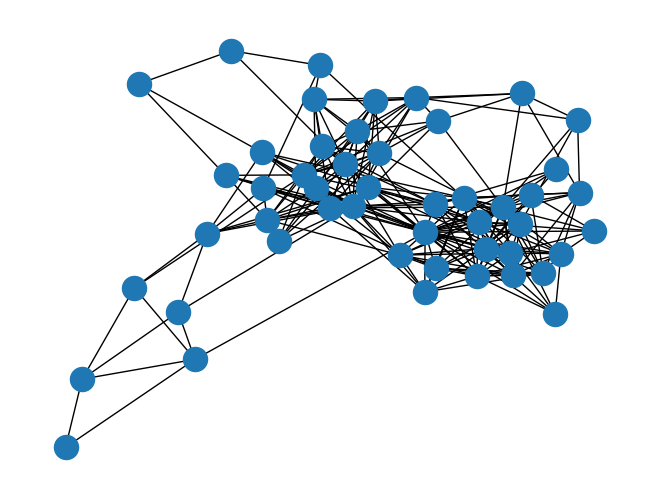

In [8]:
# Perform a random walk and take an induced subgraph on a random walk trajectory
RW_trajectory = RW(G0, steps=50, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

#has possibility to sample same node twice, thats why 47 < 50

Number of nodes: 94
Number of edges: 190


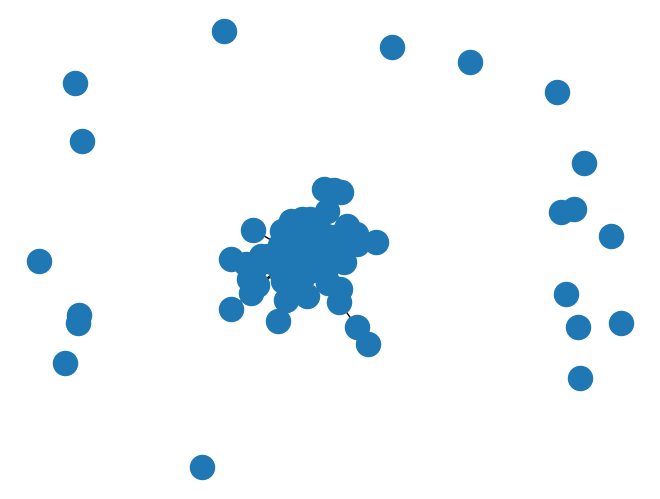

In [9]:
IID_trajectory = IID_sampling(G0, steps=100)
H = G.subgraph(nodes=IID_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

#not as connected as RW sampling

Number of nodes: 50
Number of edges: 95


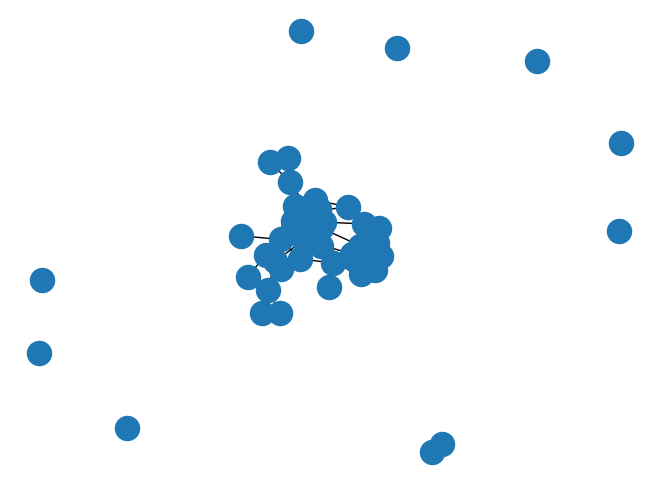

In [10]:
IID_trajectory = IID_sampling(G0, steps=50)
H = G.subgraph(nodes=IID_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

#not as connected as RW sampling

In [11]:
#edge density of IID sampled graph and average density, compare it to edge density of G
IID_trajectory = IID_sampling(G0, steps=50)
H = G.subgraph(nodes=IID_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
#nx.draw(H)
num_nodes = len(list(H.nodes()))
num_edges = len(list(H.edges()))
nodes_choose_two = (num_nodes *(num_nodes - 1))/2
edge_density = num_edges / nodes_choose_two

print("Edge Density: ", edge_density)

Number of nodes: 50
Number of edges: 66
Edge Density:  0.053877551020408164


In [12]:
sample_size = 100
IID_sampling_steps = 50
edge_density_list = []

for i in range(sample_size):
  #edge density of IID sampled graph and average density, compare it to edge density of G
  IID_trajectory = IID_sampling(G0, steps=50)
  H = G.subgraph(nodes=IID_trajectory)
  #nx.draw(H)
  num_nodes = len(list(H.nodes()))
  num_edges = len(list(H.edges()))
  nodes_choose_two = (num_nodes *(num_nodes - 1))/2
  edge_density = num_edges / nodes_choose_two

  edge_density_list.append(edge_density)

print("Edge Density List: ", edge_density_list)

KeyboardInterrupt: 

In [ ]:
#very close to population graph
average_edge_density = np.mean(edge_density_list)
print("Average Edge Density", average_edge_density)

# Empirical distribution of RW

In [ ]:
def emp_dist_RW(G, k=100):
    RW_trajectory = RW(G, steps=k, return_history=True)
    nodes=list(G.nodes())

    emp_dist = {}
    for v in nodes:
        emp_dist.update({v:0})


    for v in RW_trajectory:
        j = emp_dist.get(v)
        emp_dist.update({v: j+1})

    emp_dist_list = [emp_dist.get(v) for v in nodes]

    return emp_dist, emp_dist_list

In [ ]:
RW(G, steps=100, return_history=True)

In [ ]:
emp_dist, emp_dist_list = emp_dist_RW(G, k=1000)

In [ ]:
def BA(G0=None, m0=1, m=1, n=100, alpha=1):
    # Barabasi-Albert model with baseline graph G = single node with m0 self-loops
    # Each new node has m edges pointing to some nodes in the existing graph
    # alpha=1 -> preferential attachment: The head of each new directed edge is chosen randomly with probability
    # proportional to the degree
    # alpha=0 ->: Uniform attachment: The head of each new directed edge is chosen uniformly at random
    # alpha \notin\{0,1} -> nonlinear preferential attachment: The head of each new directed edge is chosen
    # randomly with probability proportional to the degree^alpha

    if G0 is not None:
        G = G0
    else:
        G = nx.MultiGraph() # baseline graph with a single node and m0 self-loops
        for i in np.arange(m0):
            G.add_edge(1,1)

    for s in np.arange(1,n):
        for j in np.arange(m):
            # form a degree distribution
            degrees = np.asarray([G.degree(n)**(alpha) for n in G.nodes()])
            deg_dist = degrees*(1/np.sum(degrees))
            v = np.random.choice(G.nodes(), p=deg_dist)
            G.add_edge(s,v)

    return G


In [ ]:
### Load Graph
#G = nx.erdos_renyi_graph(n=100,p=0.2)
G = BA(G0=None, m0=2, m=1, n=100, alpha=1)


### Plot empirical frequencies
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_samples_display = 3
k_list = [10, 100, 1000, 100000]

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=1, wspace=0.5, hspace=0)



for i in np.arange(len(k_list)+1):
    if i < len(k_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        k = k_list[i]
        emp_dist, a = emp_dist_RW(G, k=k)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n ({} samples)".format(k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        #ax.set_title("RW empirical distribution", fontsize=8)


    else:
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("RW empirical distribution vs. normalized degrees", y=0.95)
plt.savefig("RW_empirical_dist", bbox_inches ="tight")

# RW on graphs as Markov chains

In [ ]:
def RW_transition_mx(G):
    ### Compute random walk transition matrix of a graph G
    A = nx.adjacency_matrix(G).todense()
    P = np.zeros(shape=A.shape)
    nodes = list(G.nodes())
    for i in np.arange(A.shape[0]): ## normalize rows of A by degree
        if G.degree(nodes[i])>0:
            P[i,:] = A[i,:]/G.degree(nodes[i])
    return P

In [ ]:
G = nx.erdos_renyi_graph(n=10,p=0.5)

A = nx.adjacency_matrix(G).todense()

plt.imshow(A)

In [ ]:
P = RW_transition_mx(G)

plt.imshow(P)

In [ ]:
def RW_MC(G, k=1, dist=None):
    ### Random walk on G by using Markov transition matrix
    P = RW_transition_mx(G)
    if dist is None:
        ## choose a uniformly random node and set dist to be the point mass at that node
        v_index = np.arange(len(G.nodes()))
        x = np.random.choice(v_index)
        dist = [0]*len(v_index)
        dist[x] = 1

    dist = np.asarray(dist)
    for i in np.arange(k):
        dist = dist @ P
    return dist


In [ ]:
G = nx.erdos_renyi_graph(n=10,p=0.3)

In [ ]:
# plot the graph
fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(10)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [ ]:
## choose a uniformly random node and set dist to be the point mass at that node
v_index = np.arange(len(G.nodes()))
x = np.random.choice(v_index)
dist = [0]*len(v_index)
dist[x] = 1


In [ ]:
dist

In [ ]:
RW_MC(G, k=100, dist=dist)

In [ ]:
RW_MC(G, k=101, dist=dist)

In [ ]:
## Load Caltech Facebook graph

# Initialize graph
G = nx.Graph()

# Load Caltech.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
print("edge density:", nx.density(G))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print("Avg. clustering coefficient:", nx.average_clustering(G0))
print("Avg. shortest path length:", nx.average_shortest_path_length(G0))


# Perform a random walk and take an induced subgraph on a random walk trajectory
RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

In [ ]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_samples_display = 3
k_list = [1, 2, 5]

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=1, wspace=0.5, hspace=0)

## choose a uniformly random node and set dist to be the point mass at that node
v_index = np.arange(len(H.nodes()))
x = np.random.choice(v_index)
dist = [0]*len(v_index)
dist[x] = 1


for i in np.arange(len(k_list)+1):
    if i < len(k_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        k = k_list[i]
        a = RW_MC(H, k=k, dist=dist)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(a, label='{}-step RW distribution'.format(k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        #ax.set_title("RW empirical distribution", fontsize=8)


    else:
        b = [H.degree(n) for n in H.nodes()]
        b = np.asarray(b)/len(list(H.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("RW multi-step distribution vs. normalized degrees", y=0.95)
plt.savefig("RW_multi_step_dist1", bbox_inches ="tight")

In [ ]:
## load Caltech graph
G = nx.Graph()
k_list = [1,2,5]

# Load Caltech.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

## Creat figure
fig = plt.figure(figsize=[11,4], constrained_layout=False)
network_list = [""]
n_samples_display = 3
initial_nodes = [100, 760]
k_list = [1, 2, 5]
ymax = 0.03

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=2, wspace=0.13, hspace=0)

for j in np.arange(2):
    #n = n_list[j]
    #G = nx.cycle_graph(n=n)

    ## choose a uniformly random node and set dist to be the point mass at that node
    v_index = np.arange(len(G.nodes()))
    #x = np.random.choice(v_index)
    x = initial_nodes[j]
    dist = [0]*len(v_index)
    dist[x] = 1

    for i in np.arange(len(k_list)+1):
        if i < len(k_list):
            inner_grid = outer_grid[i,j].subgridspec(1, 1, wspace=0, hspace=0)

            k = k_list[i]
            a = RW_MC(G, k=k, dist=dist)
            ax = fig.add_subplot(inner_grid[0, 0])
            ax.plot(a, label='{}-step RW distribution'.format(k))
            ax.legend(loc='upper right')
            #ax.set_xlabel("nodes")
            ax.set_xticks([])
            #ax.set_title("RW empirical distribution", fontsize=8)
            #ax.set_ylim(0, ymax)

            if i == 0:
                ax.set_title("Initialized at node {}".format(x))

        else:
            b = [G.degree(n) for n in G.nodes()]
            b = np.asarray(b)/len(list(G.edges()))

            inner_grid = outer_grid[-1,j].subgridspec(1, 1, wspace=0, hspace=0)
            ax = fig.add_subplot(inner_grid[0, 0])
            #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
            #        histtype='stepfilled', density=False, linewidth=1)
            ax.plot(b, label='normalized degrees', color='r')
            #ax.plot(b, label='degree/2|E|')
            ax.legend()
            ax.set_xlabel("nodes")
            #ax.set_title("Normalized degrees", fontsize=8)
            #ax.set_ylim(0, ymax)

plt.suptitle(r"RW multi-step distribution vs. normalized degrees ($G=$Caltech)".format(n), y=1)
plt.savefig("RW_multi_step_dist_Caltech".format(n), bbox_inches ="tight")

In [ ]:
n = 19
G = nx.cycle_graph(n=n)

In [ ]:
A = nx.adjacency_matrix(G).todense()

In [ ]:
plt.imshow(A)

In [ ]:
v_index = np.arange(len(G.nodes()))
#x = np.random.choice(v_index)
x = n // 2
dist = [0]*len(v_index)
dist[x] = 1

In [ ]:
RW_MC(G, k=1000, dist=dist)

In [ ]:
### Cycle graph
fig = plt.figure(figsize=[11,4], constrained_layout=False)
network_list = [""]
n_samples_display = 3
n_list = [14, 15]
k_list = [1, 2, 200, 201]

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=2, wspace=0.12, hspace=0)

for j in np.arange(2):
    n = n_list[j]
    G = nx.cycle_graph(n=n)

    ## choose a uniformly random node and set dist to be the point mass at that node
    v_index = np.arange(len(G.nodes()))
    #x = np.random.choice(v_index)
    x = n // 2
    dist = [0]*len(v_index)
    dist[x] = 1

    for i in np.arange(len(k_list)+1):
        if i < len(k_list):
            inner_grid = outer_grid[i,j].subgridspec(1, 1, wspace=0, hspace=0)

            k = k_list[i]
            a = RW_MC(G, k=k, dist=dist)
            ax = fig.add_subplot(inner_grid[0, 0])
            ax.plot(a, label='{}-step RW distribution'.format(k))
            ax.legend(loc='upper right')
            #ax.set_xlabel("nodes")
            ax.set_xticks([])
            #ax.set_title("RW empirical distribution", fontsize=8)
            ax.set_ylim(0,0.8)

            if i == 0:
                ax.set_title("Cycle $C_{{{}}}$".format(n))

        else:
            b = [G.degree(n) for n in G.nodes()]
            b = np.asarray(b)/len(list(G.edges()))

            inner_grid = outer_grid[-1,j].subgridspec(1, 1, wspace=0, hspace=0)
            ax = fig.add_subplot(inner_grid[0, 0])
            #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
            #        histtype='stepfilled', density=False, linewidth=1)
            ax.plot(b, label='normalized degrees', color='r')
            #ax.plot(b, label='degree/2|E|')
            ax.legend()
            ax.set_xlabel("nodes")
            #ax.set_title("Normalized degrees", fontsize=8)
            ax.set_ylim(0,0.8)

plt.suptitle(r"RW multi-step distribution vs. normalized degrees".format(n), y=1)
plt.savefig("RW_multi_step_dist_cycle_{}".format(n), bbox_inches ="tight")

# Metropolis-Hastings correction of RW on Graphs

## Empirical distribution

In [ ]:
def RW(G, x0=None, steps=1, return_history=False, use_MH=False):
    ### simple symmetric random walk on graph G
    ### initialization at x0
    ### If use_MH, then use Metropolis-Hastings rule so that
    ### the unifrom distribution becomes the stationary distribution
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0

    history = []
    for i in np.arange(steps):
        if len(list(G.neighbors(x))) == 1:
            print("RW is stuck at isolated node")
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        else:
            x1 = np.random.choice(list(G.neighbors(x)))
            if use_MH:
                U = np.random.rand()
                if U < G.degree(x)/G.degree(x1):
                    x = x1
            else:
                x = x1

        if return_history:
            history.append(x)

    if not return_history:
        return x
    else:
        return history

In [ ]:
def emp_dist_RW(G, k=100, use_MH=False):
    RW_trajectory = RW(G, steps=k, return_history=True, use_MH=use_MH)
    nodes=list(G.nodes())

    emp_dist = {}
    for v in nodes:
        emp_dist.update({v:0})


    for v in RW_trajectory:
        j = emp_dist.get(v)
        emp_dist.update({v: j+1})

    emp_dist_list = [emp_dist.get(v) for v in nodes]

    return emp_dist, emp_dist_list

In [ ]:
## load Caltech graph
G = nx.Graph()

# Load Caltech.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])


fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_samples_display = 3
k_list = [100, 1000, 200000]
use_MH = True
y_max = 0.005

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=1, wspace=0.5, hspace=0)



for i in np.arange(len(k_list)+1):
    if i < len(k_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        k = k_list[i]
        emp_dist, a = emp_dist_RW(G, k=k, use_MH=use_MH)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n ({} samples)".format(k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        ax.set_ylim(0, 1.5*np.max(np.asarray(a)/k))
        #ax.set_title("RW empirical distribution", fontsize=8)


    else:
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("RW empirical distribution vs. normalized degrees (MH used)", y=0.95)
plt.savefig("RW_empirical_dist_MH", bbox_inches ="tight")

## Multi-step distribution

In [ ]:
def RW_transition_mx(G, use_MH=False):
    from tqdm import trange
    ### Compute random walk transition matrix of a graph G
    A = nx.adjacency_matrix(G).todense()
    P = np.zeros(shape=A.shape)
    nodes = list(G.nodes())
    for i in np.arange(A.shape[0]): ## normalize rows of A by degree
        if G.degree(nodes[i])>0:
            P[i,:] = A[i,:]/G.degree(nodes[i])

    if use_MH:
        E = nx.adjacency_matrix(G).nonzero() ## Nonzero entries of the sparse form of the adjacency matrix
        for k in np.arange(len(E[0])): ## A for loop on the edges, rather than pairs of nodes.
            i = E[0][k]
            j = E[1][k]
            if G.degree(nodes[j])>G.degree(nodes[i]):
                P[i,j] = P[i,j]*(G.degree(nodes[i])/G.degree(nodes[j]))

        for i in np.arange(A.shape[1]): ## Add in rejection probabilities on the diagonal
            P[i,i] = 1 - np.sum(P[i,:])
    return P

In [ ]:
def RW_MC(G, k=1, dist=None, use_MH=False):
    ### Random walk on G by using Markov transition matrix
    P = RW_transition_mx(G, use_MH=use_MH)

    if dist is None:
        ## choose a uniformly random node and set dist to be the point mass at that node
        v_index = np.arange(len(G.nodes()))
        x = np.random.choice(v_index)
        dist = [0]*len(v_index)
        dist[x] = 1

    dist = np.asarray(dist)
    for i in np.arange(k):
        dist = dist @ P
    return dist


In [ ]:
G = nx.erdos_renyi_graph(n=10,p=0.5)
A = nx.adjacency_matrix(G).todense()
plt.imshow(A)

In [ ]:
P = RW_transition_mx(G, use_MH=False)
plt.imshow(P)

In [ ]:
P = RW_transition_mx(G, use_MH=True)
plt.imshow(P)

In [ ]:
P = RW_transition_mx(G, use_MH=True)
plt.imshow(P)

In [ ]:
## load Caltech graph
G = nx.Graph()
k_list = [1,2,5]

# Load Caltech.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

# Take the largest connected compoment
G = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

## Creat figure
fig = plt.figure(figsize=[11,4], constrained_layout=False)
network_list = [""]
n_samples_display = 3
initial_nodes = [100, 760]
k_list = [1, 500, 1000]
ymax = 0.03

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=2, wspace=0.13, hspace=0)

for j in np.arange(2):
    #n = n_list[j]
    #G = nx.cycle_graph(n=n)

    ## choose a uniformly random node and set dist to be the point mass at that node
    v_index = np.arange(len(G.nodes()))
    #x = np.random.choice(v_index)
    x = initial_nodes[j]
    dist = [0]*len(v_index)
    dist[x] = 1

    for i in np.arange(len(k_list)+1):
        if i < len(k_list):
            inner_grid = outer_grid[i,j].subgridspec(1, 1, wspace=0, hspace=0)

            k = k_list[i]
            a = RW_MC(G, k=k, dist=dist, use_MH=True)
            ax = fig.add_subplot(inner_grid[0, 0])
            ax.plot(a, label='{}-step RW distribution'.format(k))
            ax.legend(loc='upper right')
            #ax.set_xlabel("nodes")
            ax.set_xticks([])
            #ax.set_title("RW empirical distribution", fontsize=8)
            ax.set_ylim(0, 2*np.max(a))

            if i == 0:
                ax.set_title("Initialized at node {}".format(x))

        else:
            b = [G.degree(n) for n in G.nodes()]
            b = np.asarray(b)/len(list(G.edges()))

            inner_grid = outer_grid[-1,j].subgridspec(1, 1, wspace=0, hspace=0)
            ax = fig.add_subplot(inner_grid[0, 0])
            #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
            #        histtype='stepfilled', density=False, linewidth=1)
            ax.plot(b, label='normalized degrees', color='r')
            #ax.plot(b, label='degree/2|E|')
            ax.legend()
            ax.set_xlabel("nodes")
            #ax.set_title("Normalized degrees", fontsize=8)
            #ax.set_ylim(0, ymax)

plt.suptitle(r"RW-MH multi-step distribution vs. normalized degrees ($G=$Caltech)".format(n), y=1)
plt.savefig("RW_multi_step_dist_Caltech_MH".format(n), bbox_inches ="tight")

# PageRank

## Empirical distribution

In [ ]:
def PR(G, x0=None, steps=1, return_history=False, alpha=0):
    from tqdm import trange
    # PageRank on digraph G
    # initialization at x0
    # alpha = PageRank parameter; probability of making RW move; 1-alpha is the probability of teleportation.
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0

    history = []
    for i in trange(steps):
        U = np.random.rand()
        if U>alpha:
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        elif (len(list(G.neighbors(x))) == 0):
            #print("RW is stuck at isolated")
            x = x
        else:
            x = np.random.choice(list(G.neighbors(x))) # DiGraph.neighbors gives out-neighbors

        if return_history:
            history.append(x)

    if not return_history:
        return x
    else:
        return history

In [ ]:
PR(G, steps=100, return_history=True, alpha=0.9)

In [ ]:
def emp_dist_PR(G, k=100, alpha=1):
    PR_trajectory = PR(G, steps=k, return_history=True, alpha=alpha)
    nodes=list(G.nodes())

    emp_dist = {}
    for v in nodes:
        emp_dist.update({v:0})


    for v in PR_trajectory:
        j = emp_dist.get(v)
        emp_dist.update({v: j+1})

    emp_dist_list = [emp_dist.get(v) for v in nodes]

    return emp_dist, emp_dist_list

In [ ]:
## load Caltech graph
G = nx.Graph()

# Load Caltech.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])


fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
k = 10000
alpha_list = [0.4, 0.6, 0.8, 1]
y_max = 0.005

outer_grid = gridspec.GridSpec(nrows=len(alpha_list)+1, ncols=1, wspace=0.5, hspace=0)



for i in np.arange(len(alpha_list)+1):
    if i < len(alpha_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        alpha = alpha_list[i]
        emp_dist, a = emp_dist_PR(G, k=k, alpha=alpha)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n" + r"($\alpha=${}, $steps=${})".format(alpha,k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        ax.set_ylim(0, 1.5*np.max(np.asarray(a)/k))
        #ax.set_title("RW empirical distribution", fontsize=8)


    else:
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("PR empirical distribution vs. normalized degrees (MH used)", y=0.95)
plt.savefig("PR_empirical_dist", bbox_inches ="tight")

## Multi-step distribution

In [ ]:
def PR_transition_mx(G, alpha=0.8):
    from tqdm import trange
    ### Compute random walk transition matrix of a graph G
    A = nx.adjacency_matrix(G).todense()
    P = np.zeros(shape=A.shape)
    nodes = list(G.nodes())
    for i in np.arange(A.shape[0]): ## normalize rows of A by degree
        if G.degree(nodes[i])>0:
            P[i,:] = A[i,:]/G.degree(nodes[i])

    Q = alpha * P + (1-alpha) * np.ones(shape=A.shape)
    return P

In [ ]:
def PR_MC(G, k=1, dist=None, alpha=0.8):
    ### Random walk on G by using Markov transition matrix
    P = PR_transition_mx(G, alpha=alpha)

    if dist is None:
        ## choose a uniformly random node and set dist to be the point mass at that node
        v_index = np.arange(len(G.nodes()))
        x = np.random.choice(v_index)
        dist = [0]*len(v_index)
        dist[x] = 1

    dist = np.asarray(dist)
    for i in np.arange(k):
        dist = dist @ P
    return dist

In [ ]:
## load Caltech graph
G = nx.Graph()
k_list = [1,2,5]

# Load Caltech.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

# Take the largest connected compoment
G = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

## Creat figure
fig = plt.figure(figsize=[11,4], constrained_layout=False)
network_list = [""]
n_samples_display = 3
initial_nodes = [100, 760]
k_list = [1, 3, 5]
ymax = 0.03
alpha = 0.8

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=2, wspace=0.13, hspace=0)

for j in np.arange(2):
    #n = n_list[j]
    #G = nx.cycle_graph(n=n)

    ## choose a uniformly random node and set dist to be the point mass at that node
    v_index = np.arange(len(G.nodes()))
    #x = np.random.choice(v_index)
    x = initial_nodes[j]
    dist = [0]*len(v_index)
    dist[x] = 1

    for i in np.arange(len(k_list)+1):
        if i < len(k_list):
            inner_grid = outer_grid[i,j].subgridspec(1, 1, wspace=0, hspace=0)

            k = k_list[i]
            a = PR_MC(G, k=k, dist=dist, alpha=alpha)
            ax = fig.add_subplot(inner_grid[0, 0])
            ax.plot(a, label='{}-step PR distribution'.format(k))
            ax.legend(loc='upper right')
            #ax.set_xlabel("nodes")
            ax.set_xticks([])
            #ax.set_title("RW empirical distribution", fontsize=8)
            ax.set_ylim(0, 2*np.max(a))

            if i == 0:
                ax.set_title("Initialized at node {}".format(x))

        else:
            b = [G.degree(n) for n in G.nodes()]
            b = np.asarray(b)/len(list(G.edges()))

            inner_grid = outer_grid[-1,j].subgridspec(1, 1, wspace=0, hspace=0)
            ax = fig.add_subplot(inner_grid[0, 0])
            #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
            #        histtype='stepfilled', density=False, linewidth=1)
            ax.plot(b, label='normalized degrees', color='r')
            #ax.plot(b, label='degree/2|E|')
            ax.legend()
            ax.set_xlabel("nodes")
            #ax.set_title("Normalized degrees", fontsize=8)
            #ax.set_ylim(0, ymax)

plt.suptitle(r"PR multi-step distribution vs. normalized degrees ($G=$Caltech, $\alpha=${})".format(alpha), y=1)
plt.savefig("PR_multi_step_dist_Caltech".format(n), bbox_inches ="tight")

In [ ]:

# Load Caltech.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/rt_justinbieber.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))


In [ ]:
edgelist

## PageRank on RETWEET network

In [ ]:
# load RETWEET Network edges (on tweets about Justin Bieber)
# source: https://networkrepository.com/rt.php


# Load rt_justinbieber.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/rt_justinbieber.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

## load Caltech graph
G = nx.DiGraph()

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

In [ ]:
# plot the graph
fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.random_layout(G),
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');
plt.savefig("retweet_bieber", bbox_inches ="tight")

In [ ]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
k = 100
alpha_list = [0.4, 0.6, 0.8, 1]
y_max = 0.005

outer_grid = gridspec.GridSpec(nrows=len(alpha_list)+1, ncols=1, wspace=0.5, hspace=0)



for i in np.arange(len(alpha_list)+1):
    if i < len(alpha_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        alpha = alpha_list[i]
        emp_dist, a = emp_dist_PR(G, k=k, alpha=alpha)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n" + r"($\alpha=${}, $steps=${})".format(alpha,k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        ax.set_ylim(0, 1.5*np.max(np.asarray(a)/k))
        #ax.set_title("RW empirical distribution", fontsize=8)


    else:
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("PR empirical distribution vs. normalized degrees", y=0.95)
plt.savefig("PR_empirical_dist_retweet", bbox_inches ="tight")

In [ ]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
k = 10000
alpha_list = [0.4, 0.6, 0.8, 1]
y_max = 0.005

outer_grid = gridspec.GridSpec(nrows=len(alpha_list)+1, ncols=1, wspace=0.5, hspace=0)



for i in np.arange(len(alpha_list)+1):
    if i < len(alpha_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        alpha = alpha_list[i]
        emp_dist, a = emp_dist_PR(G, k=k, alpha=alpha)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n" + r"($\alpha=${}, $steps=${})".format(alpha,k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        ax.set_ylim(0, 1.5*np.max(np.asarray(a)/k))
        #ax.set_title("RW empirical distribution", fontsize=8)


    else:
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("PR empirical distribution vs. normalized degrees", y=0.95)
plt.savefig("PR_empirical_dist_retweet", bbox_inches ="tight")

In [ ]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
k = 100000
alpha_list = [0.4, 0.6, 0.8, 1]
y_max = 0.005

outer_grid = gridspec.GridSpec(nrows=len(alpha_list)+1, ncols=1, wspace=0.5, hspace=0)



for i in np.arange(len(alpha_list)+1):
    if i < len(alpha_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        alpha = alpha_list[i]
        emp_dist, a = emp_dist_PR(G, k=k, alpha=alpha)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n" + r"($\alpha=${}, $steps=${})".format(alpha,k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        ax.set_ylim(0, 1.5*np.max(np.asarray(a)/k))
        #ax.set_title("RW empirical distribution", fontsize=8)


    else:
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k",
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("PR empirical distribution vs. normalized degrees", y=0.95)
plt.savefig("PR_empirical_dist_retweet", bbox_inches ="tight")